In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Helper_Functions import *

### Load Data

In [20]:
h1 = np.load('1H.npy')
h2 = np.load('2H.npy')
h1o = np.load('1H_O.npy')
h2o = np.load('2H_O.npy')
h1=  h1[30:-30]
h2 = h2[30:-30]
h1o=  h1o[30:-30]
h2o = h2o[30:-30]
h = np.zeros((len(h1) + len(h2),20))
h[:len(h1)] = h1
h[len(h1):] = h2
ho = np.zeros((len(h1) + len(h2),20))
ho[:len(h1o)] = h1o
ho[len(h1o):] = h2o

### Load Velocity Weight Comparisons

In [21]:
velocity_weight_in_phase = []
velocity_weight_out_of_phase = []
weight_range = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for weight in weight_range:
    h1_weight = np.load(f'1H_mu_{weight}.npy')
    h2_weight = np.load(f'2H_mu_{weight}.npy')
    h1o_weight = np.load(f'1H_O_mu_{weight}.npy')
    h2o_weight = np.load(f'2H_O_mu_{weight}.npy')
    h1_weight=  h1_weight[30:-30]
    h2_weight = h2_weight[30:-30]
    h1o_weight=  h1o_weight[30:-30]
    h2o_weight = h2o_weight[30:-30]
    h_weight = np.zeros((len(h1_weight) + len(h2_weight),20))
    h_weight[:len(h1_weight)] = h1_weight
    h_weight[len(h1_weight):] = h2_weight
    ho_weight = np.zeros((len(h1_weight) + len(h2_weight),20))
    ho_weight[:len(h1o_weight)] = h1o_weight
    ho_weight[len(h1o_weight):] = h2o_weight
    velocity_weight_in_phase.append(h_weight)
    velocity_weight_out_of_phase.append(ho_weight)

In [19]:
h2o_weight - h2_weight

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Mean Visible Players

In [3]:
np.mean(h == 0)*20

np.float64(10.603317535545022)

### Mean Errors

In [27]:
### In phase
np.mean(np.sqrt(h)),np.mean(np.sqrt(h[h>0])),np.median(np.sqrt(h[h>0]))

(3.446037394482611, 7.3345830457036465, 5.3747348161307045)

In [33]:
### Out of phase
np.mean(np.sqrt(ho)),np.mean(np.sqrt(ho[h==0]))

(np.float64(3.5474842009827388), np.float64(0.22208041356010744))

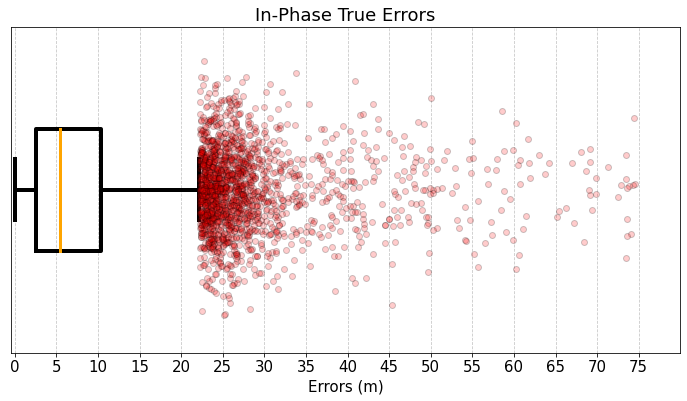

In [109]:
plt.rcParams['font.size'] = 15

fig,ax =plt.subplots(figsize= (12,6))
bp = plt.boxplot(np.sqrt(h[h>0]),vert=False)
plt.grid(axis='x', linestyle='--', alpha=0.7)
# Customize the appearance of the boxes and box lines
boxprops = dict(linewidth=4, color='k')
flierprops = dict(marker='o', markerfacecolor='red', markersize=6,whis=[0,0.99])

for box in bp['boxes']:
    box.set(**boxprops)
for whisker in bp['whiskers']:
    whisker.set(linewidth=4, color='k')
for whisker in bp['medians']:
    whisker.set(linewidth=3, color='orange')
for cap in bp['caps']:
    cap.set(linewidth=4, color='k')
jitter = 0.05 # Adjust the jitter amount as needed
for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='red', markersize=6,alpha=0.2)
    y_data = flier.get_ydata()
    jittered_y = y_data + np.random.normal(0, jitter, len(y_data))
    flier.set_ydata(jittered_y)
plt.xlabel('Errors (m)')
plt.ylim([0.8,1.2])
plt.title('In-Phase True Errors')
plt.yticks([])
plt.xlim([-0.5,80])
plt.xticks(np.arange(16)*5)
plt.savefig('Error Distribution.jpg',dpi=300,bbox_inches = 'tight')

### Errors with out-of-shot time

In [112]:
times = 300*np.ones_like(h)
for n in range(len(h)):
    for m in range(20):
        curr = n+0
        while h[curr,m]!=0:
            curr-=1
            if curr == -1:
                break
        if curr >-1:
            times[n,m] = n-curr
        curr = n+0
        while h[curr,m]!=0:
            curr += 1
            if curr == len(h):
                break
        if curr != len(h):
            times[n,m] = min(curr-n,times[n,m])

In [213]:
scores = np.zeros(31)
u95 = np.zeros(31)
l95 = np.zeros(31)
u75 = np.zeros(31)
l75 = np.zeros(31)
for t in range(31):
    scores[t]  = np.mean(np.sqrt(h[times==t]))
    u95[t] = np.quantile(np.sqrt(h[times==t]),0.975)
    l95[t] = np.quantile(np.sqrt(h[times==t]),0.025)
    l75[t] = np.quantile(np.sqrt(h[times==t]),0.125)
    u75[t]= np.quantile(np.sqrt(h[times==t]),0.875)

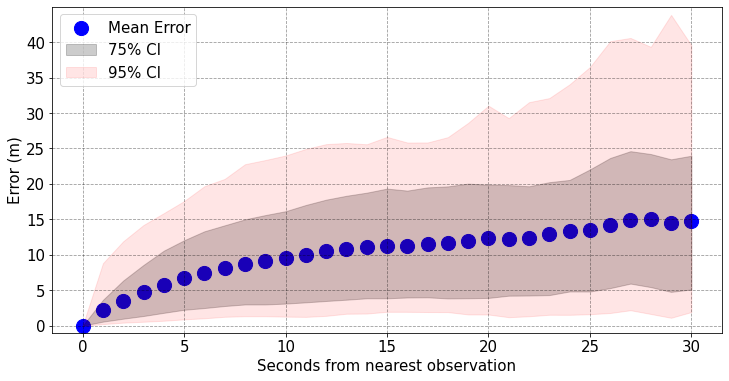

In [214]:
fig,ax =plt.subplots(figsize= (12,6))

for n in range(0):
    if n == 1:
        plt.plot([n,n],[l95[n],u95[n]],'k',label = '95% CI')
    else:
        plt.plot([n,n],[l95[n],u95[n]],'k')
plt.scatter(np.arange(31),scores,s = 200,c = 'b',label = 'Mean Error')
plt.yticks(np.arange(9)*5)
plt.grid(axis='x', linestyle='--', alpha=0.4,c = 'k')

plt.grid(axis='y', linestyle='--', alpha=0.4,c='k')
plt.xlabel('Seconds from nearest observation')
plt.ylabel('Error (m)')
plt.fill_between(np.arange(31),l75,u75,alpha = 0.2,color='k',label = '75% CI')
plt.fill_between(np.arange(31),l95,u95,alpha = 0.1,color='red',label = '95% CI')
plt.ylim([-1,45])
plt.legend(loc = 'upper left')
#plt.savefig('Errors_By_Time.jpg',dpi=300,bbox_inches = 'tight')


### Errors on Frame

In [21]:
ev = pd.read_csv('Sample_Game_1_RawEventsData.csv')
frames = ev['Start Frame'].to_numpy()

In [22]:
f_nums = np.around(frames/25)


In [23]:
np.max(f_nums)

5745.0

In [33]:
f_nums_unique = np.unique(f_nums).astype(int)

In [36]:
h1 = np.load('1H.npy')
h2 = np.load('2H.npy')
h = np.zeros((len(h1) + len(h2),20))
h[:len(h1)] = h1
h[len(h1):] = h2
hf = np.sqrt(h[f_nums_unique])
np.mean(hf[hf>0])

6.618153918211273

### Velocity Weight Errors

In [37]:
in_phase_weights = np.array(velocity_weight_in_phase)

in_phase_means = [np.mean(np.sqrt(veloc_weights[veloc_weights!=0])) for veloc_weights in velocity_weight_in_phase]
in_phase_means

[np.float64(9.176560197528632),
 np.float64(8.694797263777),
 np.float64(8.265333935368801),
 np.float64(7.901866909400196),
 np.float64(7.614881031100653),
 np.float64(7.418593573863586),
 np.float64(7.3345830457036465),
 np.float64(7.359991830259252),
 np.float64(7.499213895749762),
 np.float64(7.733357305580869),
 np.float64(8.048040164813893)]

C:\Users\mpenn\AppData\Local\Temp\ipykernel_23880\2889555024.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


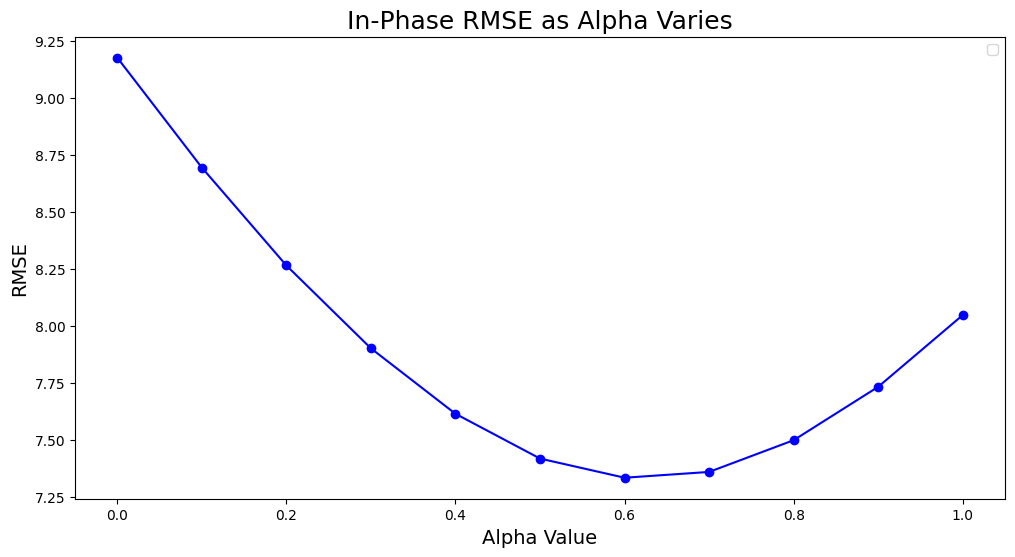

In [36]:
fig,ax = plt.subplots(figsize=(12,6))
plt.title('In-Phase RMSE as Alpha Varies', fontsize=18)
plt.plot(weight_range,in_phase_means, c='b', marker='o')
plt.legend()
plt.xlabel('Alpha Value', fontsize=14)
plt.ylabel('RMSE',fontsize=14)
plt.savefig('alpha_figure.png',dpi=300,bbox_inches='tight')

### Create Benchmarks

Model:

In [71]:
h1 = np.load('1H.npy')
h2 = np.load('2H.npy')
h1o = np.load('1H_O.npy')
h2o = np.load('2H_O.npy')
h1=  h1[30:-30]
h2 = h2[30:-30]
h1o=  h1o[30:-30]
h2o = h2o[30:-30]
h = np.zeros((len(h1) + len(h2),20))
h[:len(h1)] = h1
h[len(h1):] = h2
ho = np.zeros((len(h1) + len(h2),20))
ho[:len(h1o)] = h1o
ho[len(h1o):] = h2o

np.mean(np.sqrt(h[h!=0]))

np.float64(7.3345830457036465)

Model Without Velocity:

In [72]:
h1 = np.load('1H_no_velocity.npy')
h2 = np.load('2H_no_velocity.npy')
h1o = np.load('1H_O_no_velocity.npy')
h2o = np.load('2H_O_no_velocity.npy')
h1=  h1[30:-30]
h2 = h2[30:-30]
h1o=  h1o[30:-30]
h2o = h2o[30:-30]
h = np.zeros((len(h1) + len(h2),20))
h[:len(h1)] = h1
h[len(h1):] = h2
ho = np.zeros((len(h1) + len(h2),20))
ho[:len(h1o)] = h1o
ho[len(h1o):] = h2o

np.mean(np.sqrt(h[h!=0]))

np.float64(9.176560197528632)

Model Static:

In [73]:
h1 = np.load('1H_static.npy')
h2 = np.load('2H_static.npy')
h1o = np.load('1H_O_static.npy')
h2o = np.load('2H_O_static.npy')
h1=  h1[30:-30]
h2 = h2[30:-30]
h1o=  h1o[30:-30]
h2o = h2o[30:-30]
h = np.zeros((len(h1) + len(h2),20))
h[:len(h1)] = h1
h[len(h1):] = h2
ho = np.zeros((len(h1) + len(h2),20))
ho[:len(h1o)] = h1o
ho[len(h1o):] = h2o

np.mean(np.sqrt(h[h!=0]))

np.float64(17.617592873678174)

Constant

In [64]:
a_outfielders,_,_ = Load_Test_Data('Sample_Game_1_RawTrackingData_Away_Team.csv')
h_outfielders,_,_ = Load_Test_Data('Sample_Game_1_RawTrackingData_Home_Team.csv')

c:\Users\mpenn\Football-Tracking-Interpolation\Helper_Functions.py:87: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file).to_numpy()[3:]
c:\Users\mpenn\Football-Tracking-Interpolation\Helper_Functions.py:87: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file).to_numpy()[3:]


In [67]:
h_outfielders = h_outfielders.reshape(len(h_outfielders), 10, 2)
a_outfielders = a_outfielders.reshape(len(a_outfielders), 10, 2)

outfield_positions = np.concatenate([h_outfielders, a_outfielders], axis=0)

In [ ]:
np.std(outfield_positions[:,:,0]) + np.std(outfield_positions[:,:,1])

np.float64(43.77707455732143)

Constant 10 positions

In [76]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import linear_sum_assignment

def average_rmse(template_flat, positions_subset):
    """Objective: mean RMSE over subset given template."""
    template = template_flat.reshape(10, 2)
    total_sq_err = 0.0
    for row in positions_subset:
        # cost matrix of squared Euclidean distances
        cost = np.linalg.norm(row[:, None, :] - template[None, :, :], axis=2)**2
        r_ind, c_ind = linear_sum_assignment(cost)
        total_sq_err += np.mean(np.sum((row[r_ind] - template[c_ind])**2, axis=1))
    mean_rmse = np.sqrt(total_sq_err / len(positions_subset))
    if np.random.random() < 0.1:
        print(mean_rmse)
    return mean_rmse

def find_optimal_template(positions, sample_size=5000, max_iter=200):
    """
    positions : ndarray of shape (N, 10, 2)
    sample_size : how many rows to subsample for speed
    max_iter : max iterations for the optimiser
    """
    N = positions.shape[0]
    rng = np.random.default_rng()
    if sample_size < N:
        idx = rng.choice(N, size=sample_size, replace=False)
        subset = positions[idx]
    else:
        subset = positions

    # initialise template as mean of all points after naive matching
    # start with plain mean of all rows
    init_template = positions.mean(axis=0).reshape(-1)

    result = minimize(
        average_rmse,
        x0=init_template,
        args=(subset,),
        method="L-BFGS-B",
        options={"maxiter": max_iter}
    )

    return result.x.reshape(10, 2), result

# Example usage
# positions is your (N,10,2) numpy array
optimal_positions, opt_result = find_optimal_template(outfield_positions)
print(optimal_positions)


28.31187892892907
28.311878928768177
28.31187892824488
26.654594979991767
26.654594979912005
26.654594980075103
25.84504647129235
25.610002378583918
25.588640672887426
25.588640672885244
25.5886406728944
25.583350532457203
25.582995830801078
25.582995830804894
25.582995830800833
25.58278195251043
25.582708904898617
25.582708904899146
25.582684489337616
25.58268448933903
25.58267088974097
25.58266946788994
25.582668501297693
25.582668501297636
25.582667200639754
25.582667200639907
25.582667200639438
25.582667337382638
25.582667337382716
25.58266733738268
25.582667337382507
25.582667079406956
25.58266738502859
25.582667385028362
25.58266707646185
25.58266707646193
25.582667076461764
25.582666740999358
25.582666697267626
25.582666697267687
[[79.73527851 38.09502221]
 [57.09602042 61.42398863]
 [75.63158347 21.84022922]
 [58.02854441 22.0276136 ]
 [66.49254408 47.91370236]
 [71.48052875 63.04201836]
 [48.81462198 37.41578211]
 [79.88905564 52.63025398]
 [63.99914434 36.45564948]
 [49.38826

In [77]:
opt_result

  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: 25.582666697267722
        x: [ 7.974e+01  3.810e+01 ...  4.939e+01  5.184e+01]
      nit: 16
      jac: [-8.171e-06 -7.461e-06 ... -1.066e-06 -4.619e-06]
     nfev: 483
     njev: 23
 hess_inv: <20x20 LbfgsInvHessProduct with dtype=float64>

In [78]:
7.33/25.6

0.286328125